# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#note: It may be helpful to equate longitude values with X and latitude values with Y.

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #bump back up to 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) #bump back up to 1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities) # *** remove later

594
['san patricio', 'rikitea', 'dikson', 'port alfred', 'leningradskiy', 'amderma', 'santa ana', 'cherskiy', 'luderitz', 'ekhabi', 'pevek', 'cabo san lucas', 'punta arenas', 'busselton', 'castro', 'plouzane', 'jamestown', 'vila velha', 'taolanaro', 'hami', 'tuktoyaktuk', 'waipawa', 'port elizabeth', 'bluff', 'atuona', 'bandarbeyla', 'hermanus', 'junin', 'torbay', 'hilo', 'chokurdakh', 'belushya guba', 'ushuaia', 'coremas', 'komsomolskiy', 'santo antonio do ica', 'georgetown', 'rawannawi', 'gueret', 'shetpe', 'owo', 'avarua', 'geresk', 'adrar', 'yellowknife', 'peleduy', 'clyde river', 'cheremukhovo', 'upernavik', 'nome', 'lebu', 'itarema', 'dembi dolo', 'fairbanks', 'beyneu', 'hobart', 'albany', 'mount isa', 'bereda', 'new norfolk', 'anloga', 'westport', 'chicama', 'cayenne', 'ulladulla', 'bitkine', 'dunedin', 'cape town', 'touros', 'shenjiamen', 'kavaratti', 'carnarvon', 'aykhal', 'nemuro', 'kodiak', 'bengkulu', 'kapaa', 'soyo', 'apple valley', 'norman wells', 'isangel', 'tsihombe', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Prepare to capture weather data fields in lists
cloud =[]
country =[]
date =[]        
humidity=[]      
lat=[]   
lng =[] 
temp_max=[]
wind=[]
cities_found=[]
settings = {"units": "imperial", "appid": api_key}

# Run loop to get data (parameters guide: https://openweathermap.org/current)
print("Beginning Data Retrieval")    
print("-----------------------------")
for city in cities:
    # Handle exceptions for missing cities
    try:
        response = owm.get_current(city, **settings)
        print(f"Processing Record {cities.index(city)+1} of Set 1  | {city}")
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        date.append(response["dt"])
        wind.append(response["wind"]["speed"])
        temp_max.append(response["main"]["temp_max"])
        cities_found.append(response["name"])

    except: #HTTPError? *****
        print(f"{city} not found. Skipping...")

# Convert date to format for chart
weather_date = datetime.datetime.utcfromtimestamp(date[0])

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1  | san patricio
Processing Record 2 of Set 1  | rikitea
Processing Record 3 of Set 1  | dikson
Processing Record 4 of Set 1  | port alfred
Processing Record 5 of Set 1  | leningradskiy
amderma not found. Skipping...
Processing Record 7 of Set 1  | santa ana
Processing Record 8 of Set 1  | cherskiy
Processing Record 9 of Set 1  | luderitz
Processing Record 10 of Set 1  | ekhabi
Processing Record 11 of Set 1  | pevek
Processing Record 12 of Set 1  | cabo san lucas
Processing Record 13 of Set 1  | punta arenas
Processing Record 14 of Set 1  | busselton
Processing Record 15 of Set 1  | castro
Processing Record 16 of Set 1  | plouzane
Processing Record 17 of Set 1  | jamestown
Processing Record 18 of Set 1  | vila velha
taolanaro not found. Skipping...
Processing Record 20 of Set 1  | hami
Processing Record 21 of Set 1  | tuktoyaktuk
Processing Record 22 of Set 1  | waipawa
Processing Record 23 of Set 1  | p

In [4]:
# # *** test print - remove
# print(cities_found)
print(len(cities_found))
# print(cloud)
# print(len(cloud))
# print(country)
# print(len(country))
# print(date)
# print(len(date))
# print(humidity)
# print(len(humidity))
# print(lat)
# print(len(lat))
# print(lng)
# print(len(lng))
# print(temp_max)
# print(len(temp_max))
# print(wind)
# print(len(wind))

538


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary out of lists  
weather_dict = {
    "City": cities_found,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp": temp_max,
    "Wind Speed": wind
}

# Create dataframe
weather_data = pd.DataFrame(weather_dict)

# Export as CSV
weather_data.to_csv("weather data.csv", encoding='utf-8', index=False)

# Preview dataframe
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Patricio,0,PY,1572285931,29,-26.98,-56.83,102.81,11.30
1,Rikitea,86,PF,1572285932,83,-23.12,-134.97,71.60,17.85
2,Dikson,100,RU,1572285932,92,73.51,80.55,7.05,17.72
3,Port Alfred,51,ZA,1572285932,71,-33.59,26.89,61.00,11.01
4,Leningradskiy,100,RU,1572285932,89,69.38,178.42,17.33,38.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

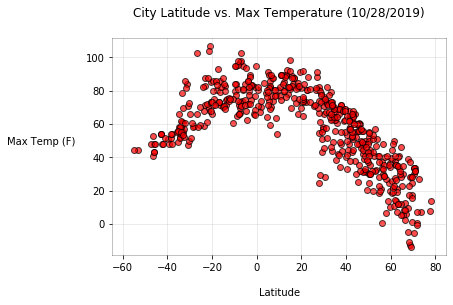

In [8]:
# Create plot
fig, ax = plt.subplots()
x_axis= weather_data['Lat']
y_axis= weather_data['Max Temp']
plt.scatter(x_axis,y_axis, marker ="o", facecolors ="red",edgecolors='black',alpha=.7)
plt.xlim(-65,85)
plt.ylim(min(y_axis)-5,max(y_axis)+5)

# Add chart elements
plt.grid(alpha=.3)
plt.title(f"City Latitude vs. Max Temperature ({weather_date.strftime('%m/%d/%Y')})\n",weight='medium')
plt.xlabel("\nLatitude")
plt.ylabel("Max Temp (F)  ",ha='right',rotation =0)

# Additional viz adjustments
ax.spines['top'].set_alpha(alpha=.3)
ax.spines['right'].set_alpha(alpha=.3)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

plt.savefig("Lat_vs_Max_temp.png")

#### Latitude vs. Humidity Plot

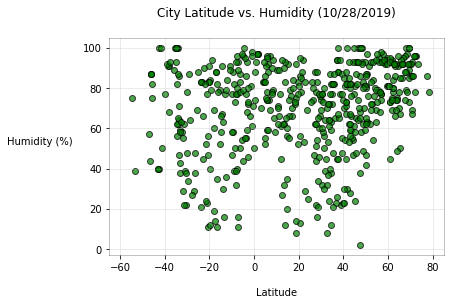

In [10]:
# Create plot
fig, ax = plt.subplots()
x_axis= weather_data['Lat']
y_axis= weather_data['Humidity']
plt.scatter(x_axis,y_axis, marker ="o", facecolors ="green",edgecolors='black',alpha=.7)
plt.xlim(-65,85)
plt.ylim(min(y_axis)-5,max(y_axis)+5)

# Add chart elements
plt.grid(alpha=.3)
plt.title(f"City Latitude vs. Humidity ({weather_date.strftime('%m/%d/%Y')})\n",weight='medium')
plt.xlabel("\nLatitude")
plt.ylabel("Humidity (%)  ",ha='right',rotation =0)

# Additional viz adjustments
ax.spines['top'].set_alpha(alpha=.3)
ax.spines['right'].set_alpha(alpha=.3)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

plt.savefig("Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

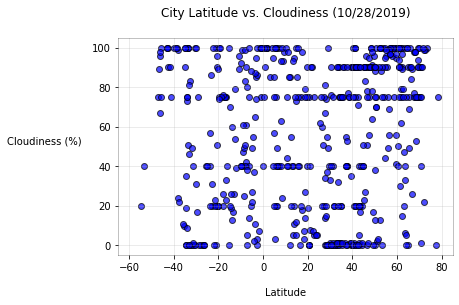

In [11]:
# Create plot
fig, ax = plt.subplots()
x_axis= weather_data['Lat']
y_axis= weather_data['Cloudiness']
plt.scatter(x_axis,y_axis, marker ="o", facecolors ="blue",edgecolors='black',alpha=.7)
plt.xlim(-65,85)
plt.ylim(0-5,100+5)

# Add chart elements
plt.grid(alpha=.3)
plt.title(f"City Latitude vs. Cloudiness ({weather_date.strftime('%m/%d/%Y')})\n",weight='medium')
plt.xlabel("\nLatitude")
plt.ylabel("Cloudiness (%)  ",ha='right',rotation =0)

# Additional viz adjustments
ax.spines['top'].set_alpha(alpha=.3)
ax.spines['right'].set_alpha(alpha=.3)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

plt.savefig("Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

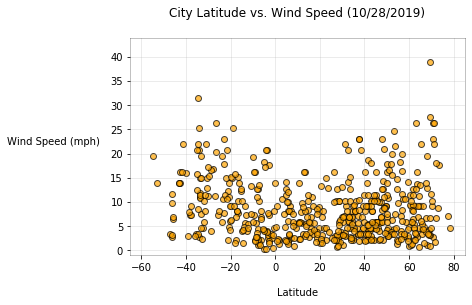

In [12]:
# Create plot
fig, ax = plt.subplots()
x_axis= weather_data['Lat']
y_axis= weather_data['Wind Speed']
plt.scatter(x_axis,y_axis, marker ="o", facecolors ="orange",edgecolors='black',alpha=.7)
plt.xlim(-65,85)
plt.ylim(0-1,max(y_axis)+5)

# Add chart elements
plt.grid(alpha=.3)
plt.title(f"City Latitude vs. Wind Speed ({weather_date.strftime('%m/%d/%Y')})\n",weight='medium')
plt.xlabel("\nLatitude")
plt.ylabel("Wind Speed (mph)  ",ha='right',rotation =0)

# Additional viz adjustments
ax.spines['top'].set_alpha(alpha=.3)
ax.spines['right'].set_alpha(alpha=.3)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

plt.savefig("Lat_vs_Wind.png")

In [ ]:
# See document "WeatherPy_Assessment_S_Clark" for analysis of data. 